# _E. coli_ Core Model Simulation with FBA
In this notebook, we perform a simulation of the _Escherichia coli_ (_E. coli_) core metabolic model using Flux Balance Analysis (FBA). FBA is a widely used computational method for analyzing the metabolic network of organisms. It allows us to predict the distribution of fluxes (reaction rates) in the network under steady-state conditions while optimizing an objective function, often related to biomass production.

By simulating the model under different constraints, we can gain insights into the organism's metabolic behavior, identify potential bottlenecks, and predict its growth under varying environmental conditions. In this analysis, we will explore how changes in nutrient availability and reaction flux constraints affect the biomass production and metabolic activity of _E. coli_.

### Loading the model

In [1]:
import cobra
import numpy as np
from cobra.io import read_sbml_model
import matplotlib.pyplot as plt
model = read_sbml_model('C:/Users/User/Downloads/e_coli_core.xml')

### Running the model with FBA

#### Objective Expression
- Mathematical representation of the cellular goal or optimization target in the model. It defines which flux or combination of fluxes the model will maximize or minimize during the analysis.
- It is a linear function of the fluxes of one or more reactions in the metabolic network.
- The objective function is calculated as $Z = \sum_{i} c_i v_i$, where $c_i$ are the coefficients, and $v_i$ are the fluxes.


In [48]:
# Understanding the objective expression

model.objective.expression

1.0*BIOMASS_Ecoli_core_w_GAM - 1.0*BIOMASS_Ecoli_core_w_GAM_reverse_712e5

The biomass reaction is often the objective in growth simulations, as it encompasses the stoichiometric requirements for producing cell components like proteins, lipids, DNA, and RNA.
<mark>BIOMASS_Ecoli_core_w_GAM</mark> term represents the forward flux of the biomass reaction in the E. coli core metabolic model. <mark>BIOMASS_Ecoli_core_w_GAM_reverse712e5</mark> term represents the reverse flux of the same biomass reaction. In most biological contexts, biomass reactions are irreversible, so this term is typically inactive (flux = 0) due to constraints. Some modeling frameworks (including COBRApy) automatically include reverse terms for reactions, even if they are irreversible. These reverse terms usually have a lower bound of 0, ensuring they do not carry flux under normal conditions.

In [2]:
# Simulation using flux balance analysis

model.optimize()

# output is an optimal solution for the objective function - Gain in Biomass
# Fluxes and reduced costs with respect to each reaction
# Reduced cost - derivatives of the objective function with respect to a reaction - how much the change of a reaction will affect the objective function

,fluxes,reduced_costs
PFK,7.477382,0.000000e+00
PFL,0.000000,-1.527746e-02
PGI,4.860861,0.000000e+00
PGK,-16.023526,-0.000000e+00
PGL,4.959985,5.854692e-18
...,...,...
NADH16,38.534610,8.673617e-19
NADTRHD,0.000000,-2.546243e-03
NH4t,4.765319,-3.665630e-17
O2t,21.799493,1.742080e-18


In [50]:
# Assigning the FBA solution to an object

solution = model.optimize()
solution.fluxes['EX_o2_e']

-21.79949265599876

In [51]:
# Investigating the attributes of the solution object

print(solution.objective_value) # The value of the optimal solution of the objective function
print(solution.status) # Outcome of the linear programming optimization
print(solution.fluxes) #  rate at which metabolites are converted from one form to another in a given reaction
print(solution.shadow_prices) # derivatives of the objective function with respect to flux of a metabolite - value of an additional unit of a resource (or constraint) in the context of the objective function

0.873921506968431
optimal
PFK         7.477382
PFL         0.000000
PGI         4.860861
PGK       -16.023526
PGL         4.959985
             ...    
NADH16     38.534610
NADTRHD     0.000000
NH4t        4.765319
O2t        21.799493
PDH         9.282533
Name: fluxes, Length: 95, dtype: float64
glc__D_e   -0.091665
gln__L_c   -0.075114
gln__L_e   -0.070022
glu__L_c   -0.070022
glu__L_e   -0.068749
              ...   
fru_e      -0.091665
fum_c      -0.048379
fum_e      -0.045832
g3p_c      -0.052198
g6p_c      -0.098030
Name: shadow_prices, Length: 72, dtype: float64


### Analyzing FBA Solutions

In [52]:
# using summary methods - information on the input and output behavior of the model, along with the optimized objective

model.summary()

# C-Number ; C-Flux - C stands for carbon

Metabolite,Reaction,Flux,C-Number,C-Flux
glc__D_e,EX_glc__D_e,10,6,100.00%
nh4_e,EX_nh4_e,4.765,0,0.00%
o2_e,EX_o2_e,21.8,0,0.00%
pi_e,EX_pi_e,3.215,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
co2_e,EX_co2_e,-22.81,1,100.00%
h2o_e,EX_h2o_e,-29.18,0,0.00%
h_e,EX_h_e,-17.53,0,0.00%


In [53]:
# Inspecting the behaviour of individual metabolites using summary methods

model.metabolites.glc__D_e.summary()

Percent,Flux,Reaction,Definition
100.00%,10,EX_glc__D_e,glc__D_e <=>
Percent,Flux,Reaction,Definition
100.00%,-10,GLCpts,glc__D_e + pep_c --> g6p_c + pyr_c


In [54]:
model.metabolites.atp_c.summary()

Percent,Flux,Reaction,Definition
66.58%,45.51,ATPS4r,adp_c + 4.0 h_e + pi_c <=> atp_c + h2o_c + 3.0 h_c
23.44%,16.02,PGK,3pg_c + atp_c <=> 13dpg_c + adp_c
2.57%,1.758,PYK,adp_c + h_c + pep_c --> atp_c + pyr_c
7.41%,5.064,SUCOAS,atp_c + coa_c + succ_c <=> adp_c + pi_c + succoa_c
Percent,Flux,Reaction,Definition
12.27%,-8.39,ATPM,atp_c + h2o_c --> adp_c + h_c + pi_c
76.46%,-52.27,BIOMASS_Ecoli_core_w_GAM,1.496 3pg_c + 3.7478 accoa_c + 59.81 atp_c + 0.361 e4p_c + 0.0709 f6p_c + 0.129 g3p_c + 0.205 g6p_c + 0.2557 gln__L_c + 4.9414 glu__L_c + 59.81 h2o_c + 3.547 nad_c + 13.0279 nadph_c + 1.7867 oaa_c + 0.5191 pep_c + 2.8328 pyr_c + 0.8977 r5p_c --> 59.81 adp_c + 4.1182 akg_c + 3.7478 coa_c + 59.81 h_c + 3.547 nadh_c + 13.0279 nadp_c + 59.81 pi_c
0.33%,-0.2235,GLNS,atp_c + glu__L_c + nh4_c --> adp_c + gln__L_c + h_c + pi_c
10.94%,-7.477,PFK,atp_c + f6p_c --> adp_c + fdp_c + h_c


### Changing concentration of metabolites and analyzing the objective function

In [3]:
# Obtaining an array of random input flux values for oxygen

oxygen_range = np.linspace(0,60)

In [4]:
oxygen_range

array([ 0.        ,  1.2244898 ,  2.44897959,  3.67346939,  4.89795918,
        6.12244898,  7.34693878,  8.57142857,  9.79591837, 11.02040816,
       12.24489796, 13.46938776, 14.69387755, 15.91836735, 17.14285714,
       18.36734694, 19.59183673, 20.81632653, 22.04081633, 23.26530612,
       24.48979592, 25.71428571, 26.93877551, 28.16326531, 29.3877551 ,
       30.6122449 , 31.83673469, 33.06122449, 34.28571429, 35.51020408,
       36.73469388, 37.95918367, 39.18367347, 40.40816327, 41.63265306,
       42.85714286, 44.08163265, 45.30612245, 46.53061224, 47.75510204,
       48.97959184, 50.20408163, 51.42857143, 52.65306122, 53.87755102,
       55.10204082, 56.32653061, 57.55102041, 58.7755102 , 60.        ])

In [5]:
biomass_flux = []
original_lower_bound = model.reactions.EX_o2_e.lower_bound

In [6]:
for x in oxygen_range:
    model.reactions.get_by_id('EX_o2_e').lower_bound = -x
    solution = model.optimize()
    biomass_flux.append(solution.objective_value)

model.reactions.EX_o2_e.lower_bound = original_lower_bound
biomass_flux

[0.21166294973531008,
 0.2557410317293361,
 0.2998191137233615,
 0.34389719571738714,
 0.38797527771141266,
 0.4320533597054382,
 0.47283501347154466,
 0.5126268225056125,
 0.5524186315396806,
 0.5922104405737489,
 0.6320022496078171,
 0.6717940586418856,
 0.7108100969559351,
 0.7389186075081347,
 0.7670271180603357,
 0.7951356286125362,
 0.8232441391647356,
 0.8513526497169367,
 0.8739215069684305,
 0.873921506968431,
 0.873921506968431,
 0.873921506968431,
 0.873921506968431,
 0.873921506968431,
 0.873921506968431,
 0.873921506968431,
 0.873921506968431,
 0.873921506968431,
 0.873921506968431,
 0.873921506968431,
 0.873921506968431,
 0.873921506968431,
 0.873921506968431,
 0.873921506968431,
 0.873921506968431,
 0.873921506968431,
 0.873921506968431,
 0.873921506968431,
 0.873921506968431,
 0.873921506968431,
 0.873921506968431,
 0.873921506968431,
 0.873921506968431,
 0.873921506968431,
 0.873921506968431,
 0.873921506968431,
 0.873921506968431,
 0.873921506968431,
 0.87392150696843

Text(0.5, 1.0, 'Change in Biomass vs Change in Oxygen concentration')

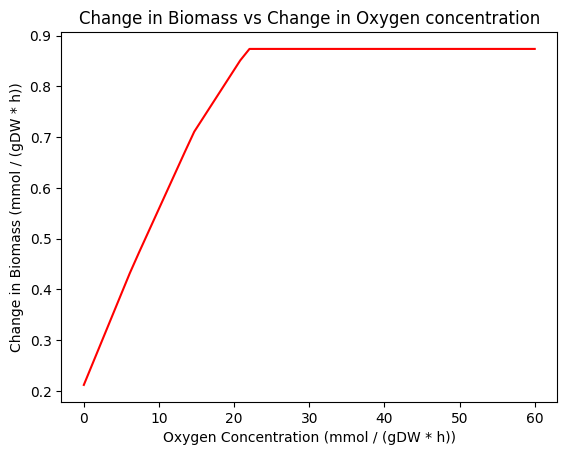

In [8]:
plt.plot(oxygen_range, biomass_flux, color = 'r')
plt.xlabel("Oxygen Concentration (mmol / (gDW * h))")
plt.ylabel("Change in Biomass (mmol / (gDW * h))")
plt.title("Change in Biomass vs Change in Oxygen concentration")

<mark>EX_O2_e</mark> represents the exchange reaction for oxygen in the extracellular environment. A negative flux in an exchange reaction indicates uptake of the metabolite. 
At lower oxygen uptake rates (less negative <mark>EX_O2_e</mark> lower bounds), oxygen is a limiting factor. As you increase the oxygen uptake rate (more negative lower bound), the metabolic network has more oxygen available for aerobic respiration and biosynthetic reactions. After a certain point, increasing oxygen uptake no longer increases biomass production. This leveling off occurs because oxygen is no longer the limiting factor.

In [9]:
# Obtaining a random array of input values for glucose

glucose_array = np.linspace(10,1000)
glucose_array

array([  10.        ,   30.20408163,   50.40816327,   70.6122449 ,
         90.81632653,  111.02040816,  131.2244898 ,  151.42857143,
        171.63265306,  191.83673469,  212.04081633,  232.24489796,
        252.44897959,  272.65306122,  292.85714286,  313.06122449,
        333.26530612,  353.46938776,  373.67346939,  393.87755102,
        414.08163265,  434.28571429,  454.48979592,  474.69387755,
        494.89795918,  515.10204082,  535.30612245,  555.51020408,
        575.71428571,  595.91836735,  616.12244898,  636.32653061,
        656.53061224,  676.73469388,  696.93877551,  717.14285714,
        737.34693878,  757.55102041,  777.75510204,  797.95918367,
        818.16326531,  838.36734694,  858.57142857,  878.7755102 ,
        898.97959184,  919.18367347,  939.3877551 ,  959.59183673,
        979.79591837, 1000.        ])

In [10]:
biomass_flux2 = []
original_lower_bound2 = model.reactions.EX_glc__D_e.lower_bound

In [11]:
for y in glucose_array:
    model.reactions.get_by_id('EX_glc__D_e').lower_bound = -y
    solution2 = model.optimize()
    biomass_flux2.append(solution2.objective_value)
    
model.reactions.EX_glc__D_e.lower_bound = original_lower_bound2
biomass_flux2

[0.873921506968431,
 2.7259235255674903,
 4.577925544166546,
 6.429927562765605,
 8.281929581364665,
 10.133931599963718,
 11.985933618562777,
 13.83793563716184,
 15.689937655760895,
 17.54193967435995,
 19.39394169295901,
 21.245943711558063,
 22.830497060201143,
 23.719352027987295,
 24.60820699577344,
 25.497061963559585,
 26.38591693134572,
 27.27477189913185,
 28.163626866917994,
 28.957138313692013,
 29.613703162754124,
 30.270268011816245,
 30.82190587463532,
 31.370822882725175,
 31.919739890814945,
 32.46865689890478,
 33.01757390699455,
 33.5664909150844,
 34.04731003781035,
 34.04731003781035,
 34.04731003781035,
 34.04731003781035,
 34.04731003781035,
 34.04731003781035,
 34.04731003781035,
 34.04731003781035,
 34.04731003781035,
 34.04731003781035,
 34.04731003781035,
 34.04731003781035,
 34.04731003781035,
 34.04731003781035,
 34.04731003781035,
 34.04731003781035,
 34.04731003781035,
 34.04731003781035,
 34.04731003781035,
 34.04731003781035,
 34.04731003781035,
 34.047

Text(0.5, 1.0, 'Change in Biomass vs Glucose concentration')

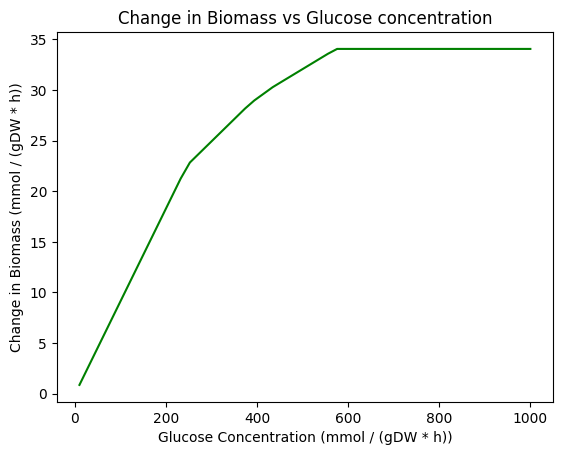

In [12]:
plt.plot(glucose_array, biomass_flux2, color='g')
plt.xlabel('Glucose Concentration (mmol / (gDW * h))')
plt.ylabel('Change in Biomass (mmol / (gDW * h))')
plt.title('Change in Biomass vs Glucose concentration')

#### 0 to 400
Biomass increases approximately linearly with glucose concentration in this range. This indicates that glucose is the primary limiting factor, and its availability directly controls biomass production

#### ~400–600
The curve starts to level off, suggesting that glucose is no longer the limiting factor. Other factors (e.g., oxygen, nitrogen, or enzyme saturation) begin to constrain biomass production

#### 600–1000
Beyond a certain glucose concentration (~600), the biomass production remains constant. This plateau represents the maximum biomass flux achievable under the given conditions

In [64]:
# Monitoring 2 reaction fluxes with respect to one range - Biomass production and Acetate production with respect to O2 input

o2vec = np.linspace(0,60)
vgro = []
vacetate = []
original_lower_bound = model.reactions.EX_o2_e.lower_bound

In [65]:
for z in o2vec:
    model.reactions.EX_o2_e.lower_bound = -z
    solution3 = model.optimize()
    vgro.append(solution3.objective_value)
    vacetate.append(solution3.fluxes.EX_ac_e)
    
model.reactions.EX_o2_e.lower_bound = original_lower_bound

Text(0, 0.5, 'Acetate secretion')

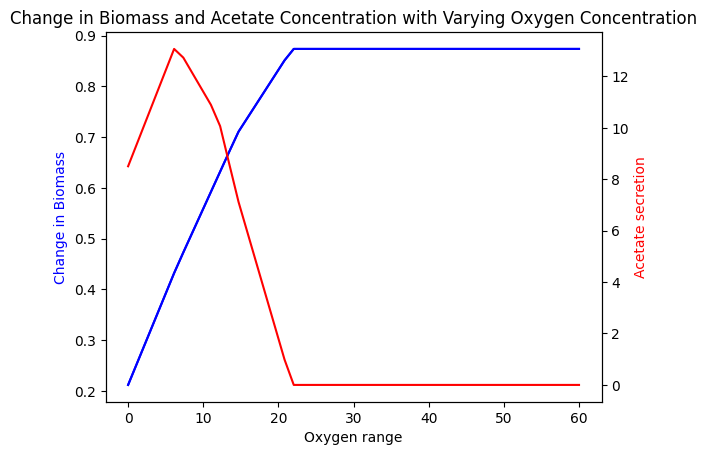

In [66]:
plt.plot(o2vec,vgro,'b')
plt.xlabel('Oxygen range')
plt.ylabel('Change in Biomass')
plt.title("Change in Biomass and Acetate Concentration with Varying Oxygen Concentration")

ax = plt.subplot(111)
ax.plot(o2vec,vgro,'b')
ax2 = plt.twinx(ax)
ax2.plot(o2vec,vacetate,'r')

ax.set_ylabel('Change in Biomass', color='b')
ax2.set_ylabel('Acetate secretion', color='r')

Under very low or no oxygen, _E. coli_ relies on fermentation pathways which often produce acetate. At higher oxygen concentrations, energy production occurs through anaerobic respiration. This high efficiency eliminates the need for acetate secretion. Instead, the carbon source is completely utilized for energy production and biomass synthesis, leading to no acetate secretion at this point.

In [45]:
### Effect of different oxygen level on different exchange reactions

### Get all the exchange reactions based on their id, assuming they all start with EX_

exchange_reactions_ids = []
for r in model.reactions:
    if 'EX_' in r.id:
        exchange_reactions_ids.append(r.id)

exchange_reactions_ids

['EX_ac_e',
 'EX_acald_e',
 'EX_akg_e',
 'EX_co2_e',
 'EX_etoh_e',
 'EX_for_e',
 'EX_fru_e',
 'EX_fum_e',
 'EX_glc__D_e',
 'EX_gln__L_e',
 'EX_glu__L_e',
 'EX_h_e',
 'EX_h2o_e',
 'EX_lac__D_e',
 'EX_mal__L_e',
 'EX_nh4_e',
 'EX_o2_e',
 'EX_pi_e',
 'EX_pyr_e',
 'EX_succ_e']

In [46]:
o2vec = np.linspace(0,60)
exchange_fluxes = {
    r: np.zeros(o2vec.size) 
    for r in exchange_reactions_ids
}

In [67]:
for index, o2_level in enumerate(o2vec):
    model.reactions.EX_o2_e.lower_bound = -o2_level
    solution = model.optimize()
    for r in exchange_reactions_ids:
        exchange_fluxes[r][index] = solution.fluxes[r]
        
model.reactions.EX_o2_e.lower_bound = original_lower_bound      
exchange_fluxes

{'EX_ac_e': array([ 8.50358528,  9.41645185, 10.32931842, 11.24218499, 12.15505157,
        13.06791814, 12.72902686, 12.1171323 , 11.50523774, 10.89334317,
        10.06463625,  8.58270954,  7.11773791,  5.89115902,  4.66458014,
         3.43800126,  2.21142238,  0.98484349,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ]),
 'EX_acald_e': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'EX_akg_e': arra

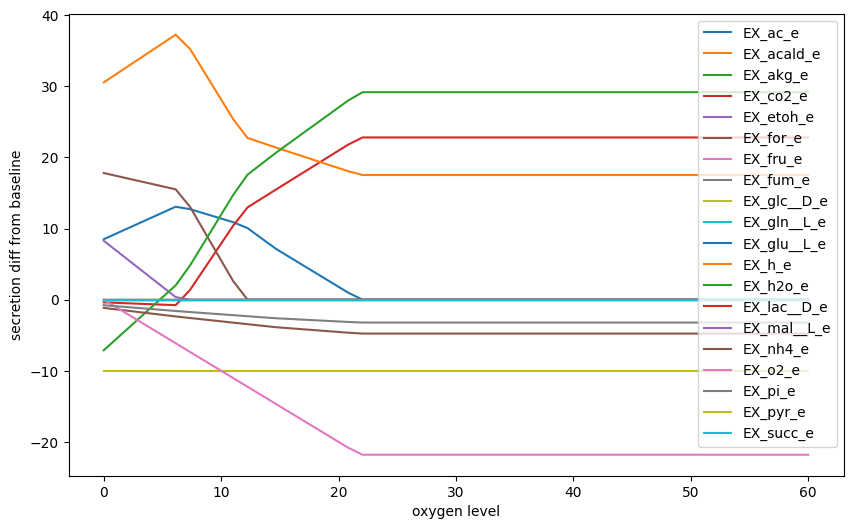

In [68]:
plt.figure(figsize=(10, 6)) 
ax = plt.subplot(111)
for r_id in exchange_reactions_ids:
    ax.plot(o2vec,exchange_fluxes[r_id], label=r_id)
ax.set_ylabel('secretion diff from baseline')
ax.set_xlabel('oxygen level')
ax.legend()

The graph captures the metabolic shift from anaerobic to aerobic growth in _E. coli_, highlighting changes in secretion patterns for key metabolites associated with fermentation, overflow metabolism, and respiration.
- Acetate secretion peaks at intermediate oxygen levels, reflecting overflow metabolism, and declines as oxygen supports full aerobic respiration
- CO₂ secretion increases steadily with oxygen, highlighting enhanced substrate oxidation in aerobic metabolism
- Fermentation byproducts like lactate, ethanol, and formate are prominent under low oxygen levels but diminish as oxygen availability rises
- Alpha-ketoglutarate secretion increases with oxygen, reflecting its role in the TCA cycle under aerobic conditions